# AI SUMMER CAMP - TRANSFER LEARNING PROJECT

## 1st PART Data Pre-processing 

In [1]:
import os
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
!pip install opencv-python

In [3]:
pwd

'C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB'

In [4]:
my_data_dir = 'C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\PetImages'
os.listdir(my_data_dir)

['Cat', 'Dog']

In [6]:
cat_dir = my_data_dir+"\\Cat"

In [7]:
dog_dir = my_data_dir+"\\Dog"

In [8]:
len(os.listdir(cat_dir))

12499

In [9]:
len(os.listdir(dog_dir))

12499

In [10]:
os.listdir(cat_dir)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

In [11]:
os.listdir(dog_dir)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

In [16]:
cat_dir

'C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\PetImages\\Cat'

In [17]:
imread(cat_dir + "\\" + os.listdir(cat_dir)[0])

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [239, 200, 121]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [152, 121,  54],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

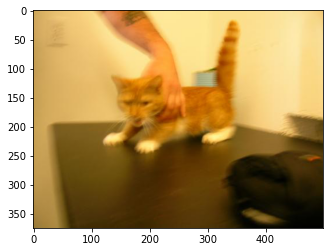

In [18]:
#show the first img
plt.imshow(imread(cat_dir + "\\" + os.listdir(cat_dir)[0]))

In [65]:
#create new folders to split the data 
os.mkdir("train")
os.mkdir("test")
os.mkdir("validation")

In [30]:
os.mkdir("resized_cat")
os.mkdir("resized_dog")

In [24]:
from PIL import Image

In [54]:
#resize and save cat imgs
files = os.listdir(cat_dir)

for f in files:
    img = Image.open(cat_dir + "\\" + f).convert("RGB")
    img = img.resize((150,150))
    img.save(f"C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\resized_cat\\cat.{f}", "JPEG")

In [55]:
#resize and save dog imgs
files = os.listdir(dog_dir)

for f in files:
    img = Image.open(dog_dir + "\\" + f).convert("RGB")
    img = img.resize((150,150))
    img.save(f"C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\resized_dog\\dog.{f}", "JPEG")

In [58]:
import shutil

In [66]:
# creating train / val /test
classes = ["cat", "dog"]

for cls in classes:
    os.makedirs("C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\" + 'train\\' + cls)
    os.makedirs("C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\" + 'validation\\' + cls)
    os.makedirs("C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\" + 'test\\' + cls)
    
for cls in classes:
    src = "C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\resized_"+ cls # folder to copy images from
    print(src)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

## here 0.75 = training ratio , (0.95-0.75) = validation ratio , (1-0.95) =  s
##training ratio  
    train_FileNames,val_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.75),int(len(allFileNames)*0.95)])

# #Converting file names from array to list

    train_FileNames = [src+'/'+ name for name in train_FileNames]
    val_FileNames = [src+'/' + name for name in val_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Training : '+ cls + ' '+str(len(train_FileNames)))
    print('Validation : '+ cls + ' ' +str(len(val_FileNames)))
    print('Testing : '+ cls + ' '+str(len(test_FileNames)))
    
## Copy pasting images to target directory

    for name in train_FileNames:
        shutil.copy(name, "C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\train\\" + cls )


    for name in val_FileNames:
        shutil.copy(name, "C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\validation\\" + cls )

    
    for name in test_FileNames:
        shutil.copy(name,"C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\test\\" + cls )


C:\Users\Selim\Desktop\CLARUS\DS\AI HUB\resized_cat
Total images  : cat 12499
Training : cat 9374
Validation : cat 2500
Testing : cat 625
C:\Users\Selim\Desktop\CLARUS\DS\AI HUB\resized_dog
Total images  : dog 12499
Training : dog 9374
Validation : dog 2500
Testing : dog 625


## 2nd PART Model 

In [67]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1,  
                               zoom_range=0.1,   
                               horizontal_flip=True, 
                               fill_mode='nearest')  

In [68]:
image_gen.flow_from_directory("C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\train")

Found 18748 images belonging to 2 classes.


In [69]:
image_shape = (128,128,3)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [72]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 8

In [81]:
train_path = "C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\train"

In [82]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18748 images belonging to 2 classes.


In [83]:
val_path = "C:\\Users\\Selim\\Desktop\\CLARUS\\DS\\AI HUB\\validation"

In [84]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 5000 images belonging to 2 classes.


In [85]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen, callbacks=[early_stop])

Epoch 1/20
2344/2344 [==============================] - 681s 290ms/step - loss: 0.6760 - accuracy: 0.5774 - val_loss: 0.6450 - val_accuracy: 0.6562
Epoch 2/20
2344/2344 [==============================] - 487s 208ms/step - loss: 0.6266 - accuracy: 0.6610 - val_loss: 0.5629 - val_accuracy: 0.7110
Epoch 3/20
2344/2344 [==============================] - 475s 202ms/step - loss: 0.5523 - accuracy: 0.7238 - val_loss: 0.5439 - val_accuracy: 0.7250
Epoch 4/20
2344/2344 [==============================] - 471s 201ms/step - loss: 0.5174 - accuracy: 0.7482 - val_loss: 0.4841 - val_accuracy: 0.7688
Epoch 5/20
2344/2344 [==============================] - 478s 204ms/step - loss: 0.4976 - accuracy: 0.7589 - val_loss: 0.4663 - val_accuracy: 0.7834
Epoch 6/20
2344/2344 [==============================] - 504s 215ms/step - loss: 0.4812 - accuracy: 0.7747 - val_loss: 0.5246 - val_accuracy: 0.7456.4813 - accuracy: 
Epoch 7/20
2344/2344 [==============================] - 479s 204ms/step - loss: 0.4634 - accur

### Model Evaluation

In [88]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675962,0.577448,0.644969,0.6562
1,0.626575,0.660977,0.562891,0.7110
2,0.552267,0.723757,0.543898,0.7250
3,0.517374,0.748240,0.484128,0.7688
4,0.497612,0.758854,0.466277,0.7834


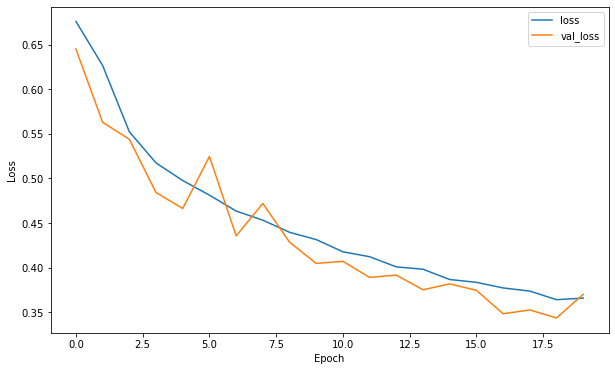

In [89]:
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show();

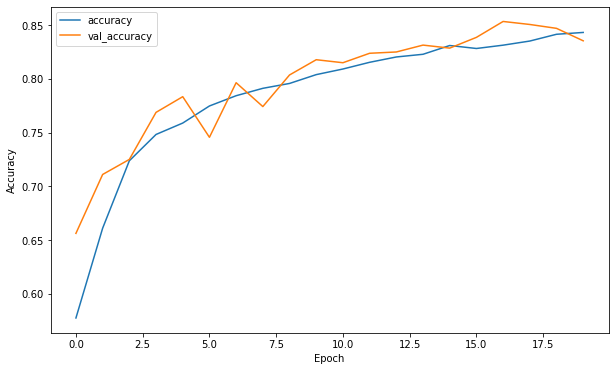

In [92]:
plt.figure(figsize=(10,6))
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show();

In [98]:
print(model.metrics_names[0] + ":" + str(model.evaluate_generator(val_image_gen)[0]))
print(model.metrics_names[1] + ":" + str(model.evaluate_generator(val_image_gen)[1]))

loss:0.3703373968601227
accuracy:0.8425999879837036


In [101]:
pred_probabilities = model.predict_generator(val_image_gen)
predictions = pred_probabilities > 0.5

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2500
           1       0.86      0.79      0.82      2500

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [103]:
confusion_matrix(val_image_gen.classes,predictions)

array([[2191,  309],
       [ 532, 1968]], dtype=int64)